＞＞＞＞＞＞＞＞注意！！！！！！！！！！！！！！！！！！！！！！！！！！！！


＞＞＞＞＞＞＞＞＞＞＞＞＞＞＞＞＞＞データの正規化の手法には、ちゃんとした定義はなく、具体例baseで頭に入れておくしかない。具体例を追うことで、正規化の意図をなんとなくつかんでくれ！！

非正規テーブルから、正規化を施すことを、データの正規化といいます。

非正規化されたテーブルの定義は厳密なものではないが、以下のような特徴を含むものを指す。

・データの重複や冗長性が存在


・一つのレコード（行）が複数の情報を持つことがある


・更新時の整合性の問題が起きやすい




非正規化された注文テーブルを見てみます。この形式では、1つの注文に対して複数の商品情報が1つのレコードに格納されている。これは、上述の３つの項目のうち、二つ目に当てはまりますね。

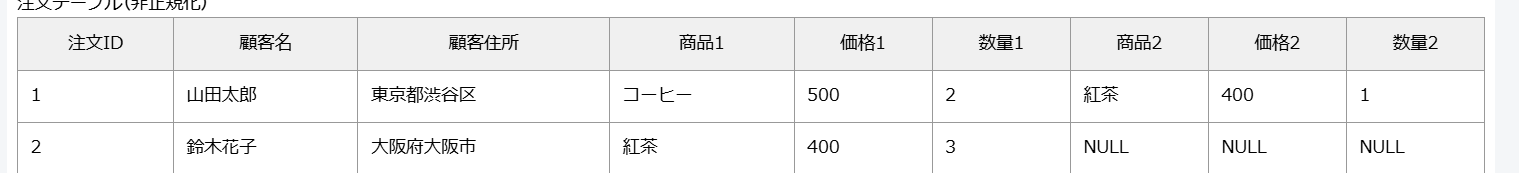

正規化の詳細を後回しにし、先に正規化後のテーブルがどんなモノなのかを見ておきましょう。

### 最終的な正規化されたデータベースの構造

1. **顧客テーブル**

   顧客情報を管理し、注文とのリレーションシップで、繰り返しのデータを必要最小限にしています。

   | 顧客ID | 顧客名   | 顧客住所     |
   |--------|----------|--------------|
   | 1      | 山田太郎 | 東京都渋谷区 |
   | 2      | 鈴木花子 | 大阪府大阪市 |

2. **注文テーブル**

   各注文がどの顧客によって行われたのかを管理し、顧客IDを参照する形にしています。

   | 注文ID | 顧客ID |
   |--------|--------|
   | 1      | 1      |
   | 2      | 2      |

3. **商品テーブル**

   商品の情報を一元管理し、価格情報を繰り返すことなく参照できるようにしています。

   | 商品ID | 商品名   | 価格 | カテゴリーID |
   |--------|----------|------|--------------|
   | 1      | コーヒー | 500  | 1            |
   | 2      | 紅茶    | 400  | 1            |

4. **注文詳細テーブル**

   各注文にどの商品が含まれているのかを管理します。商品IDと注文IDの組み合わせで数量を保持します。

   | 注文ID | 商品ID | 数量 |
   |--------|--------|------|
   | 1      | 1      | 2    |
   | 1      | 2      | 1    |
   | 2      | 2      | 3    |

5. **カテゴリーテーブル**

   商品のカテゴリー情報を管理し、商品がどのカテゴリーに属するかを示します。

   | カテゴリーID | カテゴリー名 | 説明     |
   |--------------|--------------|----------|
   | 1            | 飲料         | 飲み物全般|

### 正規化の結果と利点

- **冗長性の削減**: 商品名や価格、顧客情報などの重複データが取り除かれ、データ項目の重複がない状態になりました。
- **データ整合性の向上**: 更新や削除操作時にデータの整合性が維持され、誤ったデータが混入するリスクが低減しました。
- **メンテナンスの柔軟性**: 新しい商品や顧客の追加、情報の変更が容易になり、データベース全体のメンテナンスがしやすくなりました。
- **効率的なデータ操作**: 各テーブルの結合や更新操作が効率化され、パフォーマンスの向上に寄与しています。

これにより、正規化されたデータベース設計は、データの品質を高め、システムの適応性を向上させるための基盤を提供しています。

以下に、正規化の各ステップを分かりやすく説明し、きれいにフォーマットしたテーブルを使って示します。

### 非正規化された注文テーブル

まず、非正規化された注文テーブルを見てみます。この形式では、1つの注文に対して複数の商品情報が1つのレコードに格納されています。

#### 注文テーブル（非正規化）

| 注文ID | 顧客名   | 顧客住所     | 商品1   | 価格1 | 数量1 | 商品2 | 価格2 | 数量2 |
|--------|----------|--------------|--------|-------|-------|--------|-------|-------|
| 1      | 山田太郎 | 東京都渋谷区 | コーヒー| 500   | 2     | 紅茶   | 400   | 1     |
| 2      | 鈴木花子 | 大阪府大阪市 | 紅茶   | 400   | 3     | NULL   | NULL  | NULL  |

### 第一正規化（1NF）

**目的**: 繰り返し項目をなくし、各データを1つのセルに格納します。  
**方法**: 商品情報を分離し、1商品1レコードの形にします。

#### 注文テーブル

| 注文ID | 顧客名   | 顧客住所     |
|--------|----------|--------------|
| 1      | 山田太郎 | 東京都渋谷区 |
| 2      | 鈴木花子 | 大阪府大阪市 |

#### 注文詳細テーブル

| 注文ID | 商品名   | 価格 | 数量 |
|--------|----------|------|------|
| 1      | コーヒー | 500  | 2    |
| 1      | 紅茶    | 400  | 1    |
| 2      | 紅茶    | 400  | 3    |

### 第二正規化（2NF）

**目的**: 部分関数従属を解消し、非主属性が主キーにのみ従属するようにします。  
**方法**: 顧客情報と商品情報を別テーブルに分けます。

#### 顧客テーブル

| 顧客ID | 顧客名   | 顧客住所       |
|--------|----------|----------------|
| 1      | 山田太郎 | 東京都渋谷区   |
| 2      | 鈴木花子 | 大阪府大阪市   |

#### 注文テーブル

| 注文ID | 顧客ID |
|--------|--------|
| 1      | 1      |
| 2      | 2      |

#### 商品テーブル

| 商品ID | 商品名   | 価格 |
|--------|----------|------|
| 1      | コーヒー | 500  |
| 2      | 紅茶    | 400  |

#### 注文詳細テーブル

| 注文ID | 商品ID | 数量 |
|--------|--------|------|
| 1      | 1      | 2    |
| 1      | 2      | 1    |
| 2      | 2      | 3    |

### 第三正規化（3NF）

**目的**: 推移的関数従属を解消し、主キー以外の属性に依存しないようにします。  
**方法**: 商品のカテゴリー情報を別テーブルとして管理します。

#### 商品テーブル

| 商品ID | 商品名   | 価格 | カテゴリーID |
|--------|----------|------|--------------|
| 1      | コーヒー | 500  | 1            |
| 2      | 紅茶    | 400  | 1            |

#### カテゴリーテーブル

| カテゴリーID | カテゴリー名 | 説明     |
|--------------|--------------|----------|
| 1            | 飲料         | 飲み物全般|

このように正規化を進めることで、データの重複を減らし、更新時の一貫性を保ちやすくなります。また、DB Browser などのツールでは、外部キー制約を設定してテーブル間の関連性を管理することで、データの整合性を確保することができます。